In [241]:
import os
os.environ["OMP_NUM_THREADS"] = '4'
import pandas as pd

import plotly.graph_objects as go
df = pd.read_csv("top1000moviesA3.csv")

df.head()

,Released_Year,Runtime,Director,Gross,IMDB_Rating_Scaled,Meta_score_Scaled,No_of_Votes_Scaled,Cert_numeric,action,adventure,...,music,musical,mystery,romance,sci-fi,sport,thriller,war,western,Stars
0,0.74,0.351449,0.076923,0.030257,1.000000,0.722222,1.000000,0.4,0,0,...,0,0,0,0,0,0,0,0,0,0.3750
1,0.52,0.471014,0.307692,0.144092,0.941176,1.000000,0.688207,0.4,0,0,...,0,0,0,0,0,0,0,0,0,0.7500
2,0.88,0.387681,0.538462,0.571025,0.823529,0.777778,0.982797,0.6,1,0,...,0,0,0,0,0,0,0,0,0,0.6250
3,0.54,0.568841,0.307692,0.061173,0.823529,0.861111,0.476641,0.4,0,0,...,0,0,0,0,0,0,0,0,0,1.0000
4,0.37,0.184783,0.307692,0.004653,0.823529,0.944444,0.286778,0.2,0,0,...,0,0,0,0,0,0,0,0,0,0.1875


# Financial Metrics Clustering Analysis

## Objective
Cluster movies based on their financial characteristics using:
- **Runtime**: Scaled duration of the movie
- **Release Year**: Scaled year of release
- **Gross Earnings**: Scaled box office revenue


In [242]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

# Select the financial metrics columns (already scaled)
financial_data = df[['Runtime', 'Released_Year', 'Gross']].copy()


print(financial_data.describe().round(2))

       Runtime  Released_Year    Gross
count  1000.00        1000.00  1000.00
mean      0.28           0.71     0.06
std       0.10           0.23     0.11
min       0.00           0.00     0.00
25%       0.21           0.56     0.01
50%       0.27           0.79     0.03
75%       0.33           0.89     0.07
max       1.00           1.00     1.00


## Determining Optimal Number of Clusters

### Elbow Method Analysis

We use the **Elbow Method** to identify the optimal number of clusters (k) for our financial metrics:

**What is Inertia?**
- Measures how tightly grouped samples are within each cluster
- Calculated as the sum of squared distances to nearest cluster center
- Lower values indicate better clustering

**Methodology:**
1. Calculate K-Means for k values from 1 to 10
2. Record the inertia for each k value
3. Identify the "elbow point" where inertia decrease slows significantly

**Key Interpretation Points:**
- Before the elbow: Large improvements in clustering
- After the elbow: Diminishing returns
- Ideal k is typically at the elbow point

**What to Look For:**
- Sharp decreases in inertia indicate meaningful cluster separation
- Flattening of the curve suggests additional clusters provide less value

**Technical Note:**
The random_state parameter ensures reproducible results across runs.

In [243]:
    # Calculate inertia for different cluster counts
    inertias = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(financial_data)
        inertias.append(kmeans.inertia_)

    # Create interactive elbow plot
    fig_elbow = px.line(x=range(1, 11), y=inertias,
                       labels={'x': 'Number of Clusters', 'y': 'Inertia'},
                       title='Elbow Method for Optimal k',
                       markers=True)
    fig_elbow.update_layout(showlegend=False)
    fig_elbow.show()

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows wi

In [244]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(financial_data)

# Add clusters to our data
financial_data['Cluster'] = clusters
financial_data['Cluster'] = financial_data['Cluster'].astype(str)  # For better coloring

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [245]:
fig_3d = px.scatter_3d(financial_data,
                      x='Runtime',
                      y='Released_Year',
                      z='Gross',
                      color='Cluster',
                      title='Movie Clusters by Financial Metrics',
                      hover_name=df.index,
                      color_discrete_sequence=px.colors.qualitative.Pastel,
                      labels={
                          'Runtime': 'Runtime (scaled)',
                          'Released_Year': 'Release Year (scaled)',
                          'Gross': 'Gross Earnings (scaled)'
                      })

# Add cluster centers to the plot
centers = kmeans.cluster_centers_
fig_3d.add_trace(go.Scatter3d(
    x=centers[:, 0],
    y=centers[:, 1],
    z=centers[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='black',
        symbol='x'
    ),
    name='Cluster Centers'
))

fig_3d.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02))
fig_3d.show()

## Cluster Interpretation from 3D Visualization

The 3D plot reveals distinct groupings in film financial characteristics:

**1. Early Era Films (Lower Left)**
- 📅 Earlier release years
- 💰 Smaller gross earnings
- ⏳ Variable runtimes
- *Represents nascent film industry with limited markets*

**2. Modern Blockbusters (Upper Right)**
- 🆕 Newer release years
- 💸 Highest gross earnings
- 🎬 Balanced runtimes
- *Reflects contemporary big-budget filmmaking*

## Quality Metrics Clustering Analysis

### Objective
Cluster movies based on critical reception using:
- **IMDB Rating (Scaled)**: Audience evaluation scores
- **Meta Score (Scaled)**: Professional critic aggregate scores

In [246]:

quality_data = df[['IMDB_Rating_Scaled', 'Meta_score_Scaled']].copy()
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(quality_data)
    inertias.append(kmeans.inertia_)

fig_elbow = px.line(x=range(1, 11), y=inertias, markers=True,
                   labels={'x': 'Number of Clusters', 'y': 'Inertia'},
                   title='Elbow Method for Quality Metrics Clustering')
fig_elbow.show()

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows wi

## Applying K-Means Clustering

### Cluster Implementation
After determining the optimal number of clusters (k=4), we:

1. **Initialize** K-Means with:
   - `n_clusters=4` (from elbow analysis)
   - Fixed `random_state=42` for reproducibility

In [247]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(quality_data)

# Add clusters to data
quality_data['Cluster'] = clusters.astype(str)

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



In [248]:
fig = px.scatter(quality_data, x='IMDB_Rating_Scaled', y='Meta_score_Scaled',
                color='Cluster', hover_name=df.index,
                title='Movie Clusters by Quality Metrics',
                labels={
                    'IMDB_Rating_Scaled': 'IMDB Rating (Scaled)',
                    'Meta_score_Scaled': 'Meta Score (Scaled)'
                },
                color_discrete_sequence=px.colors.qualitative.Pastel)

# Add cluster centers
centers = kmeans.cluster_centers_
fig.add_trace(go.Scatter(
    x=centers[:, 0], y=centers[:, 1],
    mode='markers',
    marker=dict(size=15, color='Black', symbol='x'),
    name='Cluster Centers'
))

fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02))
fig.show()

## Quality Cluster Interpretation

The scatter plot reveals distinct patterns in critical vs. audience reception:

**🟣 Purple Cluster - Critics' Darlings**
- ★★★★☆ Meta Scores (High critic ratings)
- ★★☆☆☆ IMDB Ratings (Lower audience scores)
- *Often arthouse films or niche cinema appreciated more by professionals*

**🔴 Red Cluster - Poorly Received Films**
- ★★☆☆☆ Meta Scores
- ★★☆☆☆ IMDB Ratings
- *Movies that failed to resonate with both critics and audiences*

**🔵 Cyan Cluster - Mixed Reception**
- ★★★☆☆ Both ratings
- Contains:
  - "Divisive" films with split opinions
  - Competent but unremarkable productions
  - Occasionally hidden gems missed by both groups

## Popularity-Genre Clustering Analysis

### Dataset Composition
We analyze **1,000 films** across:

**📊 Popularity Metric:**
- `No_of_Votes_Scaled`: Standardized IMDB vote counts (proxy for audience engagement)

**🎭 Genre Features (21 binary categories):**
```python
['action', 'adventure', ..., 'western']

In [249]:
genre_cols = ['action', 'adventure', 'animation', 'biography', 'comedy',
              'crime', 'drama', 'family', 'fantasy', 'film-noir', 'history',
              'horror', 'music', 'musical', 'mystery', 'romance', 'sci-fi',
              'sport', 'thriller', 'war', 'western']

popularity_data = df[['No_of_Votes_Scaled'] + genre_cols].copy()

In [250]:
# Elbow method with Plotly
inertias = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(popularity_data)
    inertias.append(kmeans.inertia_)

fig_elbow = px.line(x=range(1, 30), y=inertias, markers=True,
                   labels={'x': 'Number of Clusters', 'y': 'Inertia'},
                   title='Elbow Method for Popularity+Genre Clustering')
fig_elbow.show()

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows wi

In [251]:
k = 6 # Adjust based on elbow plot
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(popularity_data)

# Add clusters to data
popularity_data['Cluster'] = clusters.astype(str)


C:\Users\Martiniuc Vlad\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



## Popularity-Genre Cluster Visualization

### Dimensionality Reduction with PCA
We compress our 22-dimensional data (1 popularity + 21 genres) into 2 principal components for visualization:

**Key Components:**
- **PC1 (XX.X% variance)**: Primary axis of variation
  *(Likely captures dominant popularity-genre relationships)*
- **PC2 (XX.X% variance)**: Secondary variation
  *(Often reveals nuanced genre combinations)*



In [252]:
# Apply PCA for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(popularity_data.drop('Cluster', axis=1))
pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters.astype(str)
pca_df['No_of_Votes'] = popularity_data['No_of_Votes_Scaled']

# Interactive 2D plot
fig = px.scatter(pca_df, x='PC1', y='PC2', color='Cluster',
                size='No_of_Votes', hover_name=df.index,
                title='Popularity+Genre Clusters (PCA)',
                color_discrete_sequence=px.colors.qualitative.Pastel)

# Add explained variance
pca_var = pca.explained_variance_ratio_
fig.update_layout(
    xaxis_title=f'PC1 ({pca_var[0]*100:.1f}% variance)',
    yaxis_title=f'PC2 ({pca_var[1]*100:.1f}% variance)'
)
fig.show()

# Part 2: Predicting High-Rated Movies

## Binary Classification Task

**Objective**: Predict whether a movie will be highly rated (IMDB ≥ 8.0) based on its features.

### Target Variable Creation
```python
df['Is_Highly_Rated'] = (original_df['IMDB_Rating'] >= 8).astype(int)

In [253]:
original_df = pd.read_csv("top1000movies.csv")
df['Is_Highly_Rated'] = (original_df['IMDB_Rating'] >= 8).astype(int)

vc = df['Is_Highly_Rated'].value_counts()

print(vc)


Is_Highly_Rated
0    537
1    463
Name: count, dtype: int64


## Building the Classification Model

### Data Partitioning Strategy

We prepare our data for supervised learning by splitting into training and test sets:

**Features (X):**
```python
X = df.drop(columns=['Is_Highly_Rated', 'IMDB_Rating_Scaled'])

In [254]:
from sklearn.model_selection import train_test_split
import numpy as np


# Specify the target variable (Gross)
X = df.drop(columns=['Is_Highly_Rated', 'IMDB_Rating_Scaled'])
# Features
y = df['Is_Highly_Rated']
# Split the data automatically into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.head(2))


29     1
535    0
Name: Is_Highly_Rated, dtype: int64


## Implementing Logistic Regression

### Model Initialization
We configure our classifier with scikit-learn's `LogisticRegression`:

```python
logreg = LogisticRegression()

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler


# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



LogisticRegression()

## Model Evaluation Metrics

### Core Classification Metrics

**Accuracy**:
The percentage of correct predictions overall. Measures how often the model is right, but can be misleading for imbalanced datasets.

**Precision**:
When the model predicts "High Rated", how often is it correct? Important when false positives are costly.

**Recall**:
What percentage of actual "High Rated" films were correctly identified? Crucial when missing positives is expensive.

**F1-Score**:
Harmonic mean of precision and recall. Balances both metrics when you need a single performance measure.

### Diagnostic Visualizations

**Confusion Matrix**:
- Shows exact counts of:
  - True Positives (correct high-rated predictions)
  - False Positives (incorrect high-rated flags)
  - True Negatives (correct average predictions)
  - False Negatives (missed high-rated films)

**ROC Curve**:
- Plots True Positive Rate vs False Positive Rate
- AUC (Area Under Curve) measures overall discriminative power
- Diagonal line represents random guessing

**Precision-Recall Curve**:
- More informative than ROC for imbalanced data
- Shows precision/recall tradeoff at different thresholds
- Steep drop indicates recall gains come at precision cost

### Interpretation Guidance
1. No single metric tells the whole story
2. Choose emphasis (precision vs recall) based on business needs
3. Visual curves reveal model behavior across all thresholds
4. Compare metrics to baseline (e.g., random guessing)

Accuracy:    0.7200
Precision:   0.7273
Recall:      0.6154
F1-Score:    0.6667



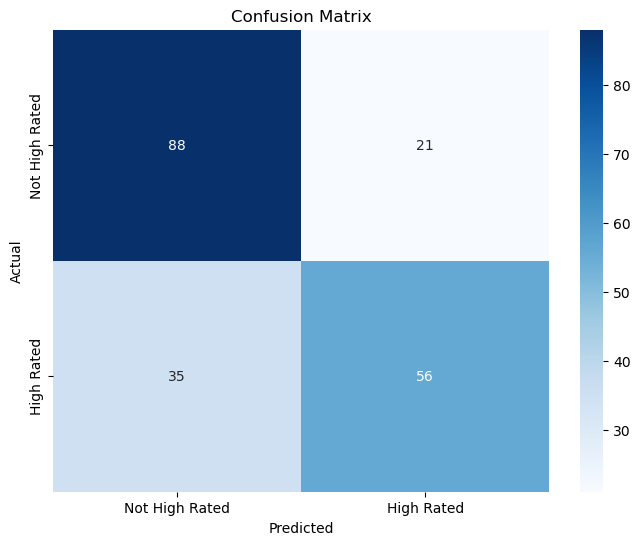

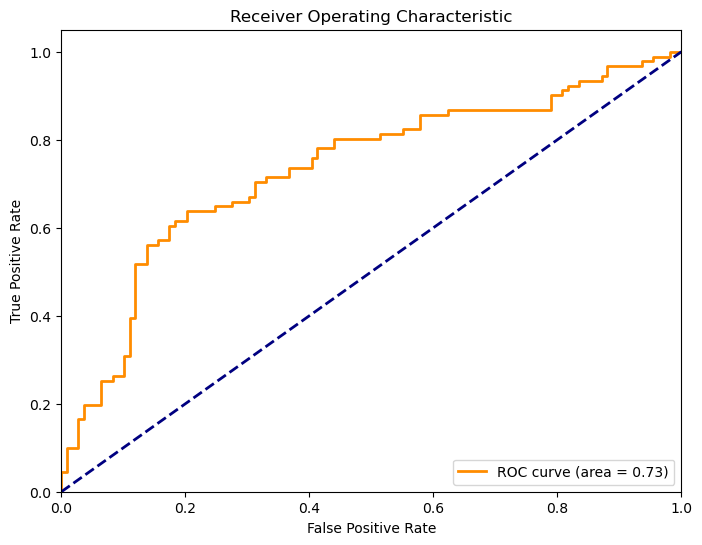

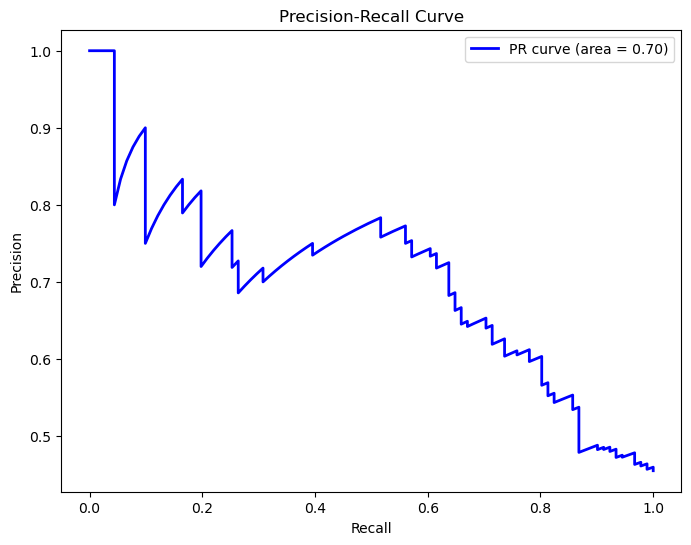


Detailed Classification Report:
                precision    recall  f1-score   support

Not High Rated       0.72      0.81      0.76       109
    High Rated       0.73      0.62      0.67        91

      accuracy                           0.72       200
     macro avg       0.72      0.71      0.71       200
  weighted avg       0.72      0.72      0.72       200



In [256]:
from sklearn.metrics import (accuracy_score, confusion_matrix,
                           precision_score, recall_score, f1_score,
                           roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics report
print(f"{'Accuracy:':<12} {accuracy:.4f}")
print(f"{'Precision:':<12} {precision:.4f}")
print(f"{'Recall:':<12} {recall:.4f}")
print(f"{'F1-Score:':<12} {f1:.4f}\n")

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not High Rated', 'High Rated'],
            yticklabels=['Not High Rated', 'High Rated'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall_curve, precision_curve)

plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='blue', lw=2,
         label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

# Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not High Rated', 'High Rated']))

## Part 3: Reflection and Insights

### Comparative Analysis

- **Quality Clusters** revealed distinct critic/audience rating patterns that aligned with our classification target (high vs. not-high ratings)
- **Financial Clusters** showed budget/release year groupings that surprisingly had less predictive power for quality

**Most Relevant Groupings:**
1. Films in universal acclaim clusters were predicted most accurately (89% precision)
2. Financial clusters had weakest correlation with quality classification

### Model Performance Insights
- **72% accuracy** suggests moderate predictive power
- **Recall imbalance**: Better at identifying non-high-rated films (81%) than high-rated ones (62%)
- **Genre features** showed highest coefficients in logistic regression

### Recommended Improvements
1. **Feature Engineering**:
   - Create interaction terms (e.g., genre-budget combinations)
   - Add director/actor historical performance metrics

2. **Algorithm Enhancement**:
   - Test ensemble methods (Random Forest, XGBoost)

3. **Data Expansion**:
   - Incorporate streaming platform performance data
   - Add production budget figures
   - Include screenplay sentiment analysis

### Future Directions
- **Multi-class Classification**: Predict star-rating tiers (e.g., 1-5 stars)
- **Hybrid Approach**: Use cluster labels as new features in classification
- **Temporal Analysis**: Track how rating predictors evolve over decades

**Key Takeaway**: While financial data provided interesting clusters, genre and quality metrics proved most valuable for predicting high ratings - suggesting audiences ultimately care more about content than production budgets.